# **CSE643: Artificial Intelligence Assignment-3**

In [1]:
import numpy as np
import pandas as pd
import bnlearn as bn
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator

## **Dataset Loading**

The dataset was loaded using the `ucimlrepo` package in python. Since it contained continuous variables, they were discretized into two bins.

In [9]:
wine = fetch_ucirepo(id=109)
X, y = wine.data.features, wine.data.targets
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
data = pd.DataFrame(X.copy(), columns=X.columns)
data["class"] = y
data

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
discrete = discretizer.fit_transform(X)
discrete = pd.DataFrame(discrete, columns=X.columns)
discrete["class"] = y
discrete

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1
2,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1
3,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1
4,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3
174,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
175,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,3
176,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3


In [17]:
discrete_train, discrete_test = train_test_split(discrete, test_size=0.2, random_state=1, stratify=df_discrete["class"])

## **Constructing the Bayesian Network**

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcalinity_of_ash:
+------------------------+-----+--------------------+
| class                  | ... | class(3)           |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(0.0) | ... | 0.2992220227408737 |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(1.0) | ... | 0.3800119688809096 |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(2.0) | ... | 0.3207660083782166 |
+------------------------+-----+--------------------+
[bnlearn] >CPD of Ash:
+-------------------+-----+---

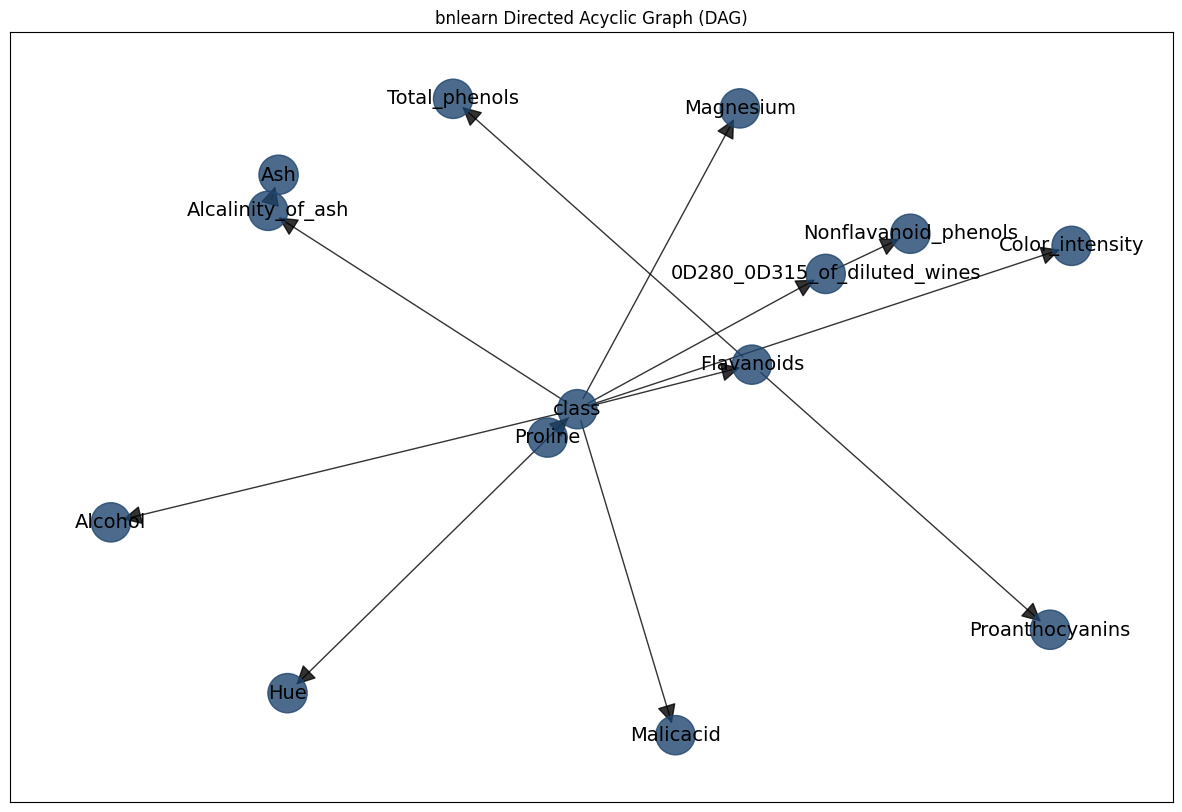

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-0.81002499, -0.42189593]),
  'Malicacid': array([ 0.10512122, -1.        ]),
  'Ash': array([-0.53818426,  0.52218446]),
  'Alcalinity_of_ash': array([-0.55504529,  0.42422276]),
  'Magnesium': array([0.20954855, 0.7024303 ]),
  'Total_phenols': array([-0.25525946,  0.7284288 ]),
  'Flavanoids': array([0.22909142, 0.00640172]),
  'Nonflavanoid_phenols': array([0.48595499, 0.36193312]),
  'Proanthocyanins': array([ 0.71241285, -0.71360218]),
  'Color_intensity': array([0.74737215, 0.32907596]),
  'Hue': array([-0.52367593, -0.88585471]),
  '0D280_0D315_of_diluted_wines': array([0.34869834, 0.25292406]),
  'Proline': array([-0.10210086, -0.19165694]),
  'class': array([-0.05390873, -0.11459144])},
 'G': <networkx.classes.digraph.DiGraph at 0x1708503ee10>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malicacid': {'node_color': '#1f456e', '

In [23]:
network_A = bn.structure_learning.fit(discrete_train, verbose=4)
network_A = bn.parameter_learning.fit(network_A, discrete_train, verbose=4)
bn.plot(network_A)

### **Testing the Accuracy of Network-A**

In [24]:
predictions_A = bn.predict(network_A, discrete_test, variables=["class"], verbose=4)
print("Accuracy of Model A:", accuracy_score(discrete_test["class"], predictions_A["class"].values))

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 458.82it/s]

Accuracy of Model A: 0.8333333333333334


### **Visualization of the Probability Distribution**

### **Examples of Parent-Child Relationship**

A few examples of parent-child relationship are: "Alcalinity_of_ash" to "Ash", "class" to "Magnesium", "Flavanoids" to "Total_phenols" and so on. The network was constructed using the `bnlearn` package in python. 

In [22]:
network_A["model_edges"]

[('Alcalinity_of_ash', 'Ash'),
 ('Flavanoids', 'Total_phenols'),
 ('Flavanoids', 'Proanthocyanins'),
 ('0D280_0D315_of_diluted_wines', 'Nonflavanoid_phenols'),
 ('Proline', 'class'),
 ('class', 'Alcohol'),
 ('class', 'Malicacid'),
 ('class', 'Alcalinity_of_ash'),
 ('class', 'Magnesium'),
 ('class', 'Flavanoids'),
 ('class', 'Color_intensity'),
 ('class', 'Hue'),
 ('class', '0D280_0D315_of_diluted_wines')]

## **Pruning the Network**

Now, we prune the previous network A to create another network, B. This method should perform better. We simply prune the model by using the `bnlearn.independence_test` method, which removes the least important edges recursively, based on a given parameter `alpha`.

[datazets] >WARNING> Replacing existing CPD for Alcalinity_of_ash
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Total_phenols
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for 0D280_0D315_of_diluted_wines
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid_phenols
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for class
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for Malicacid
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Color_intensity
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Alcalinity_of_ash:
+------------------------+-----+--------------------+
| class                  | ... | class(3)           |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(0.0) | ... | 0.2992220227408737 |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(1.0) | ... | 0.3800119688809096 |
+------------------------+-----+--------------------+
| Alcalinity_of_ash(2.0) | ... | 0.3207660083782166 |
+------------------------+-----+--------------------+
[bnlearn] >CPD of Ash:
+-------------------+-----+------------------------+
| Alcalinity_of_ash | ... | Alcalinity_of_ash(2.0) |
+-------------------+-----+------------------------+
| Ash(0.0)          | ... | 0.31625553447185323    |
+-------------------+-----+------------------------+
| Ash(1.0)          | ... | 0.32764073371283997    |
+------------------

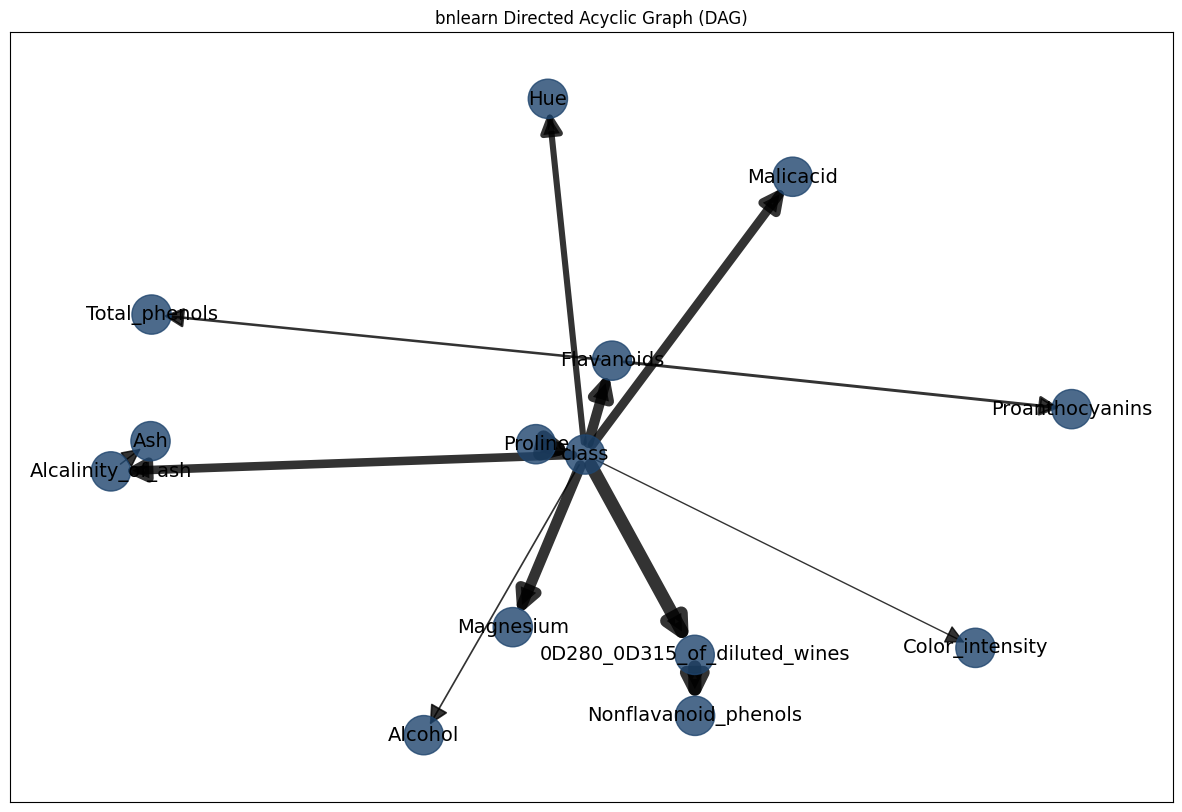

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-0.22577206, -0.72367342]),
  'Malicacid': array([0.37921163, 0.78890802]),
  'Ash': array([-0.67393832,  0.07265907]),
  'Alcalinity_of_ash': array([-0.7389603 , -0.00916834]),
  'Magnesium': array([-0.07975571, -0.43109227]),
  'Total_phenols': array([-0.67220935,  0.41567102]),
  'Flavanoids': array([0.08288148, 0.29079036]),
  'Nonflavanoid_phenols': array([ 0.219193  , -0.67128082]),
  'Proanthocyanins': array([0.83683027, 0.15944972]),
  'Color_intensity': array([ 0.67911137, -0.48714851]),
  'Hue': array([-0.02218946,  1.        ]),
  '0D280_0D315_of_diluted_wines': array([ 0.21859165, -0.5061172 ]),
  'Proline': array([-0.04179854,  0.06448912]),
  'class': array([0.03880433, 0.03651326])},
 'G': <networkx.classes.digraph.DiGraph at 0x170850b0250>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malicacid': {'node_color': '#1f456e',

In [29]:
network_B = bn.independence_test(network_A, df=discrete_train, alpha=0.001, prune=True, verbose=4)
network_B = bn.parameter_learning.fit(network_B, discrete_train, verbose=4)
bn.plot(network_B)

### **Check model parameters and results**

In [33]:
pd.DataFrame(network_B["independence_test"])

,source,target,stat_test,p_value,chi_square,dof
0,Alcalinity_of_ash,Ash,True,2.576549e-08,41.088686,4
1,Flavanoids,Total_phenols,True,4.405079e-21,101.638582,4
2,Flavanoids,Proanthocyanins,True,8.600065e-09,43.387156,4
3,0D280_0D315_of_diluted_wines,Nonflavanoid_phenols,True,4.457279e-07,35.087373,4
4,Proline,class,True,6.940552e-21,100.711362,4
5,class,Alcohol,True,5.982448e-16,77.469516,4
6,class,Malicacid,True,1.294948e-12,61.666112,4
7,class,Alcalinity_of_ash,True,2.656095e-07,36.180851,4
8,class,Magnesium,True,6.484073e-07,34.294534,4
9,class,Flavanoids,True,3.538814e-18,87.978324,4


### **Testing the Accuracy of Network-B**

In [34]:
predictions_B = bn.predict(network_B, discrete_test, variables=["class"], verbose=4)
print("Accuracy of Model B:", accuracy_score(discrete_test["class"], predictions_B["class"].values))

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 516.95it/s]

Accuracy of Model B: 0.8333333333333334


## **Using Other methods than pruning**

We use the method of Tree Augmented Naive Bayes (TAN) to construct a network. We use the `bnlearn` package to construct the network.

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of class:
+------------+---------------------+---------------------+--------------------+
| Flavanoids | Flavanoids(0.0)     | Flavanoids(1.0)     | Flavanoids(2.0)    |
+------------+---------------------+---------------------+--------------------+
| class(1)   | 0.27824151363383415 | 0.37652270210409744 | 0.3460286458333333 |
+------------+---------------------+---------------------+--------------------+
| class(2)   | 0.34835837506956036 | 0.3466223698781838  | 0.3284505208333333 |
+------------+---------------------+---------------------+--------------------+
| class(3)   | 0.37340011129660544 | 0.2768549280177187  | 0.3255208333333333 |
+------------+---------------------+---------------------+------

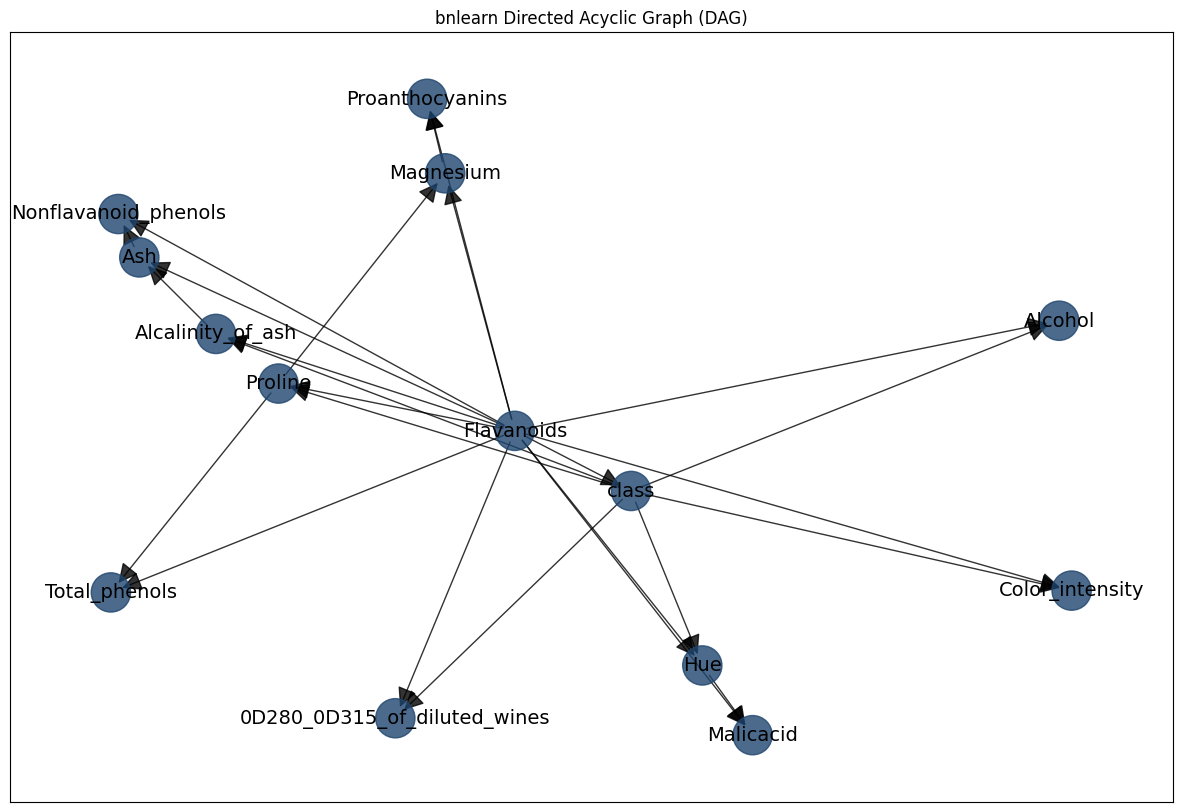

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'class': array([ 0.23894687, -0.18777883]),
  'Proline': array([-0.35899272,  0.13754349]),
  'Alcohol': array([0.96504012, 0.32782005]),
  'Color_intensity': array([ 0.98612662, -0.48958412]),
  'Hue': array([ 0.35979466, -0.7163113 ]),
  '0D280_0D315_of_diluted_wines': array([-0.16082208, -0.87621122]),
  'Alcalinity_of_ash': array([-0.4649746,  0.2878966]),
  'Magnesium': array([-0.07624663,  0.77435673]),
  'Total_phenols': array([-0.64326287, -0.49512726]),
  'Malicacid': array([ 0.44513277, -0.9275212 ]),
  'Ash': array([-0.59504872,  0.51962572]),
  'Proanthocyanins': array([-0.10690519,  1.        ]),
  'Nonflavanoid_phenols': array([-0.63052384,  0.65104281]),
  'Flavanoids': array([ 0.04173561, -0.00575146])},
 'G': <networkx.classes.digraph.DiGraph at 0x170855dda50>,
 'node_properties': {'class': {'node_color': '#1f456e', 'node_size': 800},
  'Proline': {'node_color': '#1f456e',

In [37]:
network_tan = bn.structure_learning.fit(discrete_train, methodtype="tan", class_node="Flavanoids", verbose=4)
network_tan = bn.parameter_learning.fit(network_tan, discrete_train, verbose=4)
bn.plot(network_tan)

### **Testing the Accuracy of Network-TAN**

In [39]:
predictions_tan = bn.predict(network_tan, discrete_test, variables=["class"], verbose=4)
print("Accuracy of Model TAN:", accuracy_score(discrete_test["class"], predictions_tan["class"].values))

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 513.55it/s]

Accuracy of Model TAN: 0.8888888888888888


## **Implementing Feature Selection**

Now, we use the given feature selection methods and construct a Bayesian Network C on the data. We also plot the asked probability distributions.

In [41]:
feature_selector = SelectKBest(f_classif, k=2)
features = [col for col in X.columns if col != "class"]
features = np.array(feature_selector.fit_transform(discrete, y))
features

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [0., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 1.

In [42]:
feature_data = pd.DataFrame()
feature_data["class"] = y
feature_data["feature_1"] = features[:, 0]
feature_data["feature_2"] = features[:, 1]
feature_data

,class,feature_1,feature_2
0,1,1.0,1.0
1,1,1.0,1.0
2,1,1.0,1.0
3,1,2.0,1.0
4,1,0.0,1.0
...,...,...,...
173,3,0.0,3.0
174,3,1.0,3.0
175,3,1.0,3.0
176,3,1.0,3.0


In [43]:
feature_train, feature_test = train_test_split(feature_data, test_size=0.2, random_state=1, stratify=feature_data["class"])

### **Constructing the Bayesian Network-C**

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of class:
+-----------+---------------------+---------------------+--------------------+
| feature_2 | feature_2(1.0)      | feature_2(2.0)      | feature_2(3.0)     |
+-----------+---------------------+---------------------+--------------------+
| class(1)  | 0.41571720712825005 | 0.28465698832906344 | 0.2992220227408737 |
+-----------+---------------------+---------------------+--------------------+
| class(2)  | 0.29214139643587494 | 0.430686023341873   | 0.2992220227408737 |
+-----------+---------------------+---------------------+--------------------+
| class(3)  | 0.29214139643587494 | 0.28465698832906344 | 0.4015559545182

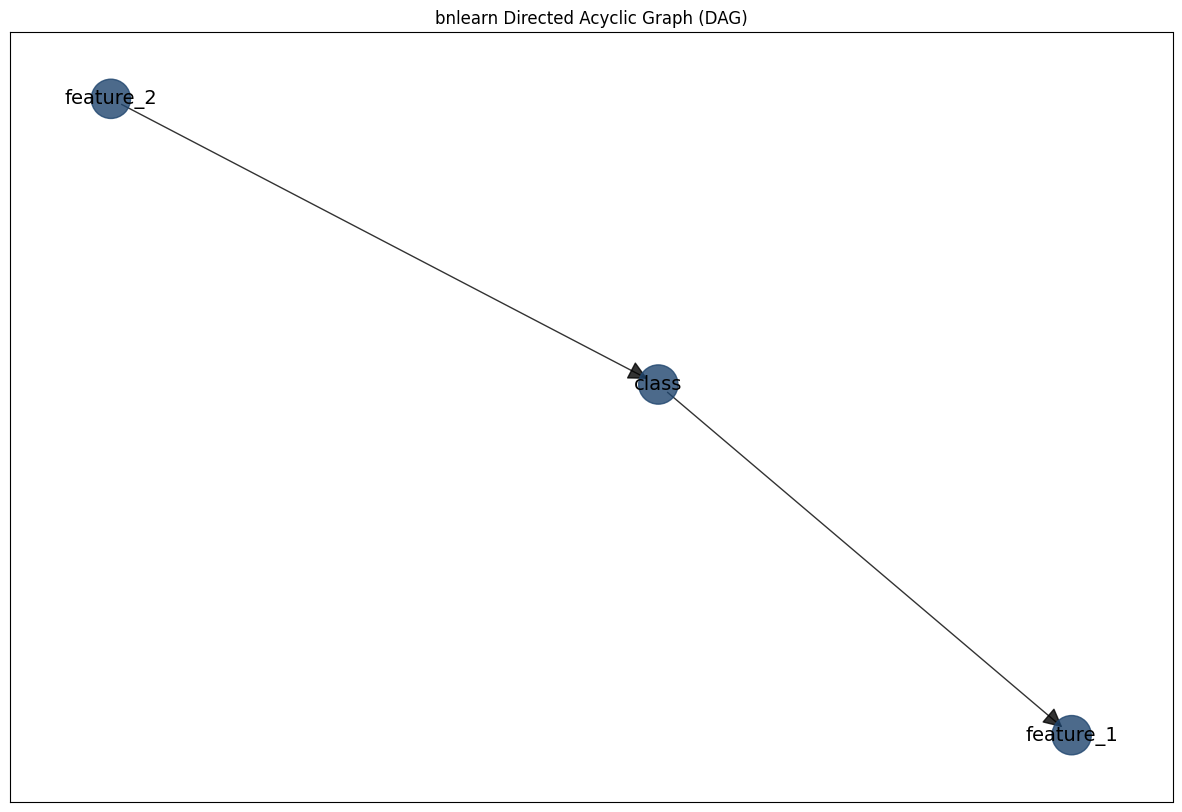

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'class': array([0.02382291, 0.06581787]),
  'feature_1': array([ 0.24410968, -1.        ]),
  'feature_2': array([-0.26793259,  0.93418213])},
 'G': <networkx.classes.digraph.DiGraph at 0x17086060610>,
 'node_properties': {'class': {'node_color': '#1f456e', 'node_size': 800},
  'feature_1': {'node_color': '#1f456e', 'node_size': 800},
  'feature_2': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('class', 'feature_1'): {'color': '#000000', 'weight': 1},
  ('feature_2', 'class'): {'color': '#000000', 'weight': 1}}}

In [44]:
network_C = bn.structure_learning.fit(feature_train, verbose=4)
network_C = bn.parameter_learning.fit(network_C, feature_train, verbose=4)
bn.plot(network_C)

### **Testing the Accuracy of Network-C**

In [45]:
predictions_C = bn.predict(network_C, feature_test, variables=["class"], verbose=4)
print("Accuracy of Model C:", accuracy_score(feature_test["class"], predictions_C["class"].values))

[bnlearn]> Remaining columns for inference: 2


100%|██████████| 6/6 [00:00<00:00, 913.10it/s]

Accuracy of Model C: 0.9722222222222222


## **Testing with PCA Feature Reduction**

In [49]:
pca = PCA(n_components=2)
normalized = (X - X.mean(axis=0)) / X.std(axis=0)
pca_data = pca.fit_transform(normalized)

pca_data = pd.DataFrame(pca_data, columns=["feature_1", "feature_2"])
pca_data

,feature_1,feature_2
0,3.307421,-1.439402
1,2.203250,0.332455
2,2.509661,-1.028251
3,3.746497,-2.748618
4,1.006070,-0.867384
...,...,...
173,-3.361043,-2.210055
174,-2.594637,-1.752286
175,-2.670307,-2.753133
176,-2.380303,-2.290884


In [50]:
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
intermediate = discretizer.fit_transform(pca_data)
pca_data = pd.DataFrame(intermediate, columns=pca_data.columns)
pca_data["class"] = y
pca_data

,feature_1,feature_2,class
0,2.0,0.0,1
1,2.0,1.0,1
2,2.0,1.0,1
3,2.0,0.0,1
4,1.0,1.0,1
...,...,...,...
173,0.0,0.0,3
174,0.0,0.0,3
175,0.0,0.0,3
176,0.0,0.0,3


In [51]:
pca_train, pca_test = train_test_split(pca_data, test_size=0.2, random_state=1, stratify=pca_data["class"])

### **Constructing the Bayesian Network**

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of class:
+----------+----------+
| class(1) | 0.333041 |
+----------+----------+
| class(2) | 0.341798 |
+----------+----------+
| class(3) | 0.325161 |
+----------+----------+
[bnlearn] >CPD of feature_1:
+----------------+-----+---------------------+
| class          | ... | class(3)            |
+----------------+-----+---------------------+
| feature_1(0.0) | ... | 0.39886295631358465 |
+----------------+-----+---------------------+
| feature_1(1.0) | ... | 0.30191502094554157 |
+----------------+-----+---------------------+
| feature_1(2.0) | ... | 0.2992220227408737  |
+----------------+-----+---------------------+
[bnlea

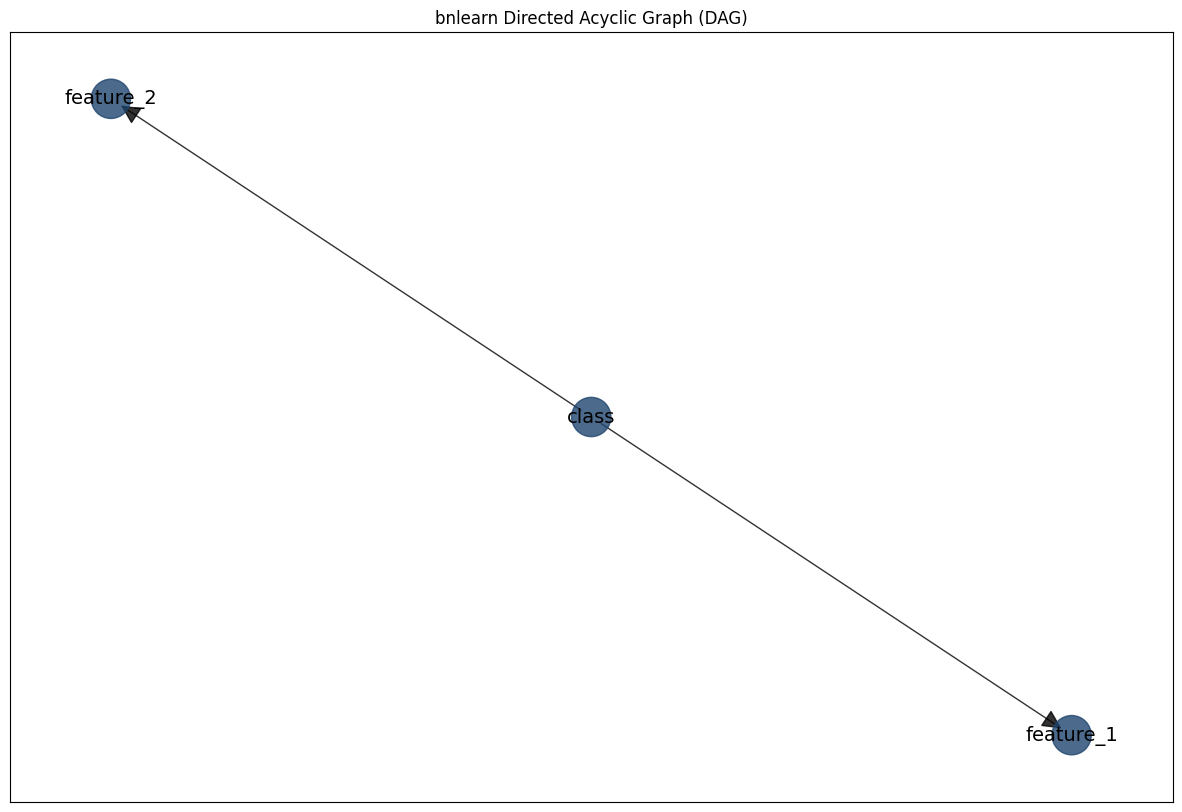

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'feature_1': array([ 0.06186803, -0.99999947]),
  'feature_2': array([-0.06186806,  1.        ]),
  'class': array([ 3.24041608e-08, -5.29946401e-07])},
 'G': <networkx.classes.digraph.DiGraph at 0x17085118610>,
 'node_properties': {'feature_1': {'node_color': '#1f456e', 'node_size': 800},
  'feature_2': {'node_color': '#1f456e', 'node_size': 800},
  'class': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('class', 'feature_1'): {'color': '#000000', 'weight': 1},
  ('class', 'feature_2'): {'color': '#000000', 'weight': 1}}}

In [52]:
network_pca = bn.structure_learning.fit(pca_train, verbose=4)
network_pca = bn.parameter_learning.fit(network_pca, pca_train, verbose=4)
bn.plot(network_pca)

### **Testing the Accuracy of Network-PCA**

In [53]:
predictions_pca = bn.predict(network_pca, pca_test, variables=["class"], verbose=4)
print("Accuracy of Model PCA:", accuracy_score(pca_test["class"], predictions_pca["class"].values))

[bnlearn]> Remaining columns for inference: 2


100%|██████████| 8/8 [00:00<?, ?it/s]

Accuracy of Model PCA: 0.8333333333333334
